In [316]:
!pip install pandas seaborn matplotlib scipy scikit-learn

In [317]:
import urllib.request

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Загрузите файл HR.csv в pandas dataframe

### 1.1 Скачиваю файл csv в рабочую директорию

In [318]:
# Ссылка на скачивание файла "HR.csv" с Google Drive
url = "https://drive.usercontent.google.com/u/0/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1&export=download"

In [319]:
# Скачивание и сохранение в рабочую директорию
urllib.request.urlretrieve(url, "HR.csv")

('HR.csv', <http.client.HTTPMessage at 0x7afaa6cf8750>)

### 1.2 Загружаю файл в pd.Dataframe

In [320]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [321]:
# Описательная статистика для DF
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [322]:
print("Мода:")
for col in df.columns:
  print(f"{col}: {df[col].mode()[0]}")

Мода:
satisfaction_level: 0.1
last_evaluation: 0.55
number_project: 4
average_montly_hours: 135
time_spend_company: 3
Work_accident: 0
left: 0
promotion_last_5years: 0
department: sales
salary: low


# 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

### 3.1  Расчет корреляционной матрицы Пирсона

In [324]:
# Последние два столбца являются строковыми, поэтому уточняем аргумент numeric_only = True, чтобы учитывать столбцы только с числовыми типами
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


### 3.2 Визуализация корреляционной матрицы

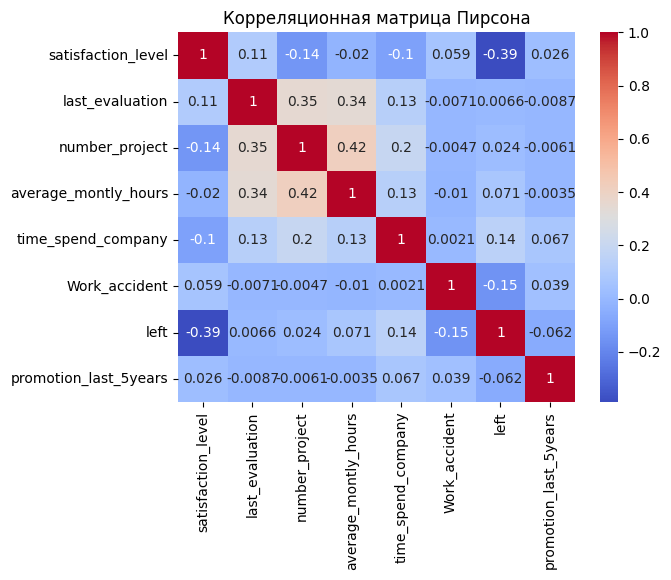

In [326]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица Пирсона')
plt.show()

### 3.3 Определение максимально и минимально скоррелированных пар

#### Получаем модули коэффициентов корреляции

In [327]:
# Чтобы оценить и сравнить абсолютные силы связи, нужно получить модули коэффициента корреляции
correlation_matrix_abs = correlation_matrix.abs()
correlation_matrix_abs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,0.142970,0.020048,0.100866,0.058697,0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,0.007104,0.006567,0.008684
number_project,0.142970,0.349333,1.000000,0.417211,0.196786,0.004741,0.023787,0.006064
average_montly_hours,0.020048,0.339742,0.417211,1.000000,0.127755,0.010143,0.071287,0.003544
time_spend_company,0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,0.007104,0.004741,0.010143,0.002120,1.000000,0.154622,0.039245
left,0.388375,0.006567,0.023787,0.071287,0.144822,0.154622,1.000000,0.061788
promotion_last_5years,0.025605,0.008684,0.006064,0.003544,0.067433,0.039245,0.061788,1.000000


#### Избавляемся от коэффициентов корреляции между одноименными переменными
При поиске пары максимально скоррелированных переменных эти значения будут нам мешать

In [328]:
for col in list(correlation_matrix_abs.columns):
  # Пересечению одноименных столбца и индекса присваиваем значение NaN
  correlation_matrix_abs.loc[col, col] = None
correlation_matrix_abs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,NaN,0.105021,0.142970,0.020048,0.100866,0.058697,0.388375,0.025605
last_evaluation,0.105021,NaN,0.349333,0.339742,0.131591,0.007104,0.006567,0.008684
number_project,0.142970,0.349333,NaN,0.417211,0.196786,0.004741,0.023787,0.006064
average_montly_hours,0.020048,0.339742,0.417211,NaN,0.127755,0.010143,0.071287,0.003544
time_spend_company,0.100866,0.131591,0.196786,0.127755,NaN,0.002120,0.144822,0.067433
Work_accident,0.058697,0.007104,0.004741,0.010143,0.002120,NaN,0.154622,0.039245
left,0.388375,0.006567,0.023787,0.071287,0.144822,0.154622,NaN,0.061788
promotion_last_5years,0.025605,0.008684,0.006064,0.003544,0.067433,0.039245,0.061788,NaN


#### Поиск минимально и максимально скоррелированных пар переменных

При поиске максимально и минимально скоррелированных пар переменных я основываюсь на том, что ***матрица корреляций всегда симметрична относительно ее диагонали***.

Соответственно при поиске максимального и минимального модуля коэффициента корреляциии в каждом столбце - соответстующий модуль коэффициента корреляции будет встречаться два раза - в двух переменных, входящих в искомую пару.

In [329]:
min_corr = list(
    correlation_matrix_abs
      .min() # Получаем минимумы модулей коэффициентов корреляции для каждой переменной
      .sort_values() # Сортируем по возрастанию - в начале будут минимальные значения модулей коэффициентов корреляций
      .head(2) # Оставляем первые два значения (именно они соответствуют двум переменным из искомой пары)
      .index # Выводим список оставшихся индексов (так как названия интересующих нас переменных находятся в индексе)
    ) # Переводим индекс в список
print(f"Минимально скоррелированы переменные:\n'{min_corr[0]}' и '{min_corr[1]}'")

Минимально скоррелированы переменные:
'Work_accident' и 'time_spend_company'


In [330]:
min_corr = list(
    correlation_matrix_abs
      .max() # Получаем максимумы модулей коэффициентов корреляции для каждой переменной
      .sort_values(ascending=False) # Сортируем по убыванию - в начале будут максимальные значения модулей коэффициентов корреляций
      .head(2) # Оставляем первые два значения (именно они соответствуют двум переменным из искомой пары)
      .index # Выводим список оставшихся индексов (так как названия интересующих нас переменных находятся в индексе)
    ) # Переводим индекс в список
print(f"Максимально скоррелированы переменные:\n'{min_corr[0]}' и '{min_corr[1]}'")

Максимально скоррелированы переменные:
'average_montly_hours' и 'number_project'


# 4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [331]:
pd.pivot_table(df, index="department", aggfunc="count", values="satisfaction_level").rename(columns={"satisfaction_level": "employee_count"})

,employee_count
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


# 5. Показать распределение сотрудников по зарплатам

In [332]:
salary_pivot = pd.pivot_table(df, index="salary", aggfunc="count", values="satisfaction_level").rename(columns={"satisfaction_level": "employee_count"})
salary_pivot

,employee_count
salary,
high,1237
low,7316
medium,6446


<ipython-input-334-573d4e064cbf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(salary_pivot["employee_count"], order=["low", "medium", "high"], palette=["red", "orange", "green"])


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

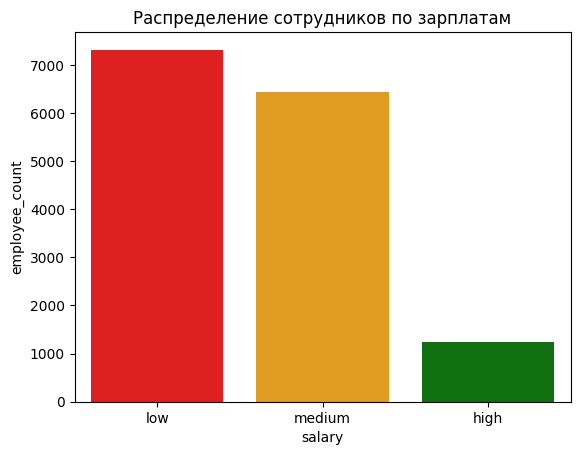

In [334]:
sns.barplot(salary_pivot["employee_count"], order=["low", "medium", "high"], palette=["red", "orange", "green"])
plt.title('Распределение сотрудников по зарплатам')

# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [335]:
salary_department_pivot = pd.pivot_table(df, index=["department", "salary"], aggfunc="count", values="satisfaction_level").rename(columns={"satisfaction_level": "employee_count"})
salary_department_pivot

employee_count
department  salary                
IT          high                83
            low                609
            medium             535
RandD       high                51
            low                364
            medium             372
accounting  high                74
            low                358
            medium             335
hr          high                45
            low                335
            medium             359
management  high               225
            low                180
            medium             225
marketing   high                80
            low                402
            medium             376
product_mng high                68
            low                451
            medium             383
sales       high               269
            low               2099
            medium            1772
support     high               141
            low               1146
            medium             942
technical   high               201
            low               1372
            medium            1147

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

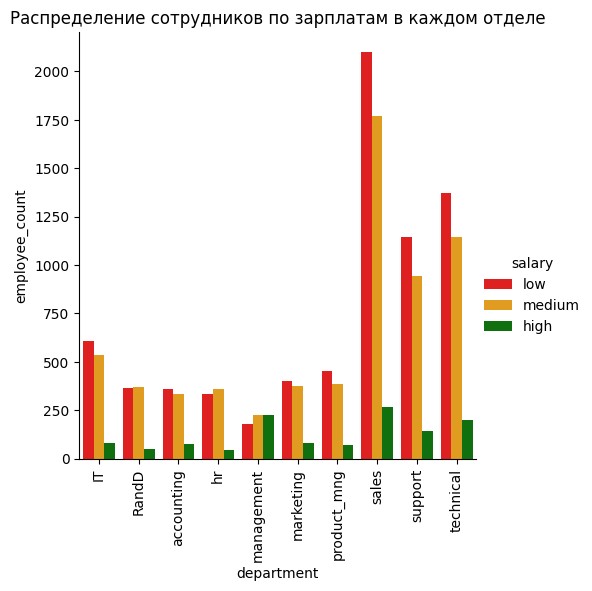

In [336]:
sns.catplot(data=salary_department_pivot,
            kind="bar",
            x="department",
            y="employee_count",
            hue="salary", hue_order=["low", "medium", "high"], palette=["red", "orange", "green"])
plt.title('Распределение сотрудников по зарплатам в каждом отделе')
plt.xticks(rotation=90)

# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

#### 7.1 Визуальный анализ

Визуально оцениваем распределение времени на работе среди работников с высоким и низким окладом

Text(0.5, 1.0, 'Распределение времени на работе среди работников с высоким и низким окладом')

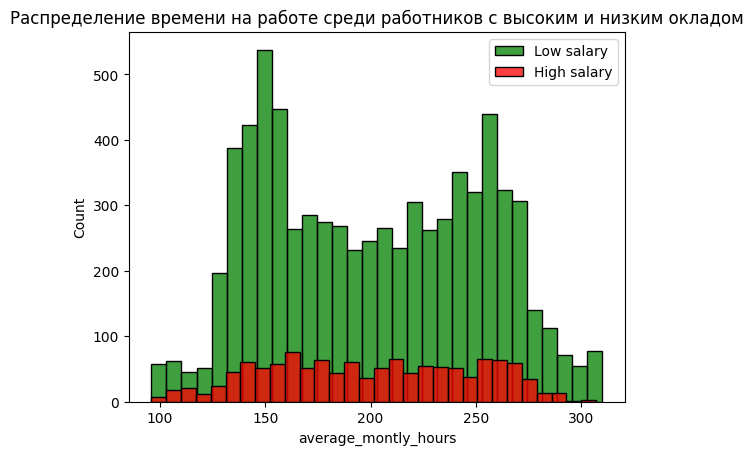

In [337]:
sns.histplot(df[df.salary == "low"], x="average_montly_hours", bins=30, color="green")
sns.histplot(df[df.salary == "high"], x="average_montly_hours", bins=30, color="red")
plt.legend(["Low salary", "High salary"])
plt.title('Распределение времени на работе среди работников с высоким и низким окладом')

<Axes: xlabel='salary', ylabel='average_montly_hours'>

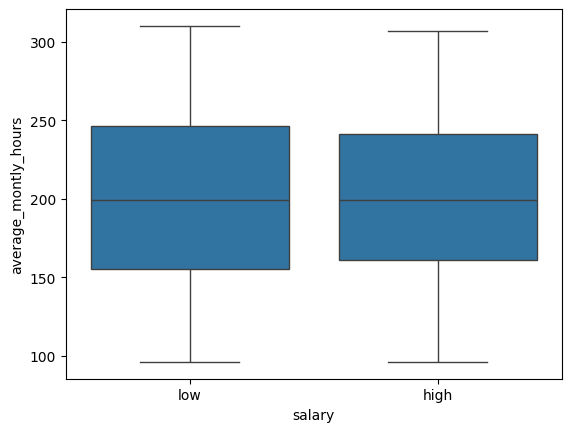

In [338]:
sns.boxplot(df, x="salary", y="average_montly_hours", order=["low", "high"])

Уже в результате визуального анализа можно сделать вывод об отличии распределения переменной от нормального. Также выраженных отличий в распределении на данном этапе анализа не выявлено.

**Более того, форма гистограммы времени на работе среди работников с низким окладом позволяет предположить наличие иного фактора, который может влиять на количество времени, проведенного на работе.**

#### 7.2 Тестирование гипотез

##### Определение гипотез

**H0:** Различий нет

**H1:** Работники с большим окладом проводят больше времени на работе, чем работники с меньшим

##### Выбор статистического метода

Т.к. распределение отлично от нормального, следует использовать непараметрические методы сравнения несвязанных выборок. Используем U-критерий Манна-Уитни.

##### Тестирование гипотезы

In [339]:
# Двухстороннее тестирование критерием Манна-Уитни
u, p = stats.mannwhitneyu(df[df.salary == "low"].average_montly_hours, df[df.salary == "high"].average_montly_hours)
print(f"p-value={round(p, 4)}")

p-value=0.8241


In [340]:
alpha = 0.05

if p < alpha:
  print(f"Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости p={p}. Выявлены статистически значимые различия.")
else:
  print(f"Нулевая гипотеза не отвергается (p<{alpha}). Различий не выявлено.")

Нулевая гипотеза не отвергается (p<0.05). Различий не выявлено.


##### Вывод

Различий в количестве времени, проведенного на работе, между работниками с высоким и низким окладом не выявлено.

# 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

#### Доля сотрудников с повышением за последние 5 лет

In [341]:
pd.pivot_table(df,
               columns="left",
               values="promotion_last_5years",
               aggfunc=(lambda x: f"{round(sum(x)/len(x)*100, 2)}%") # Функция аггрегации с расчетом доли в процентах
               ).rename(columns={0: "Not_left", 1: "Left"})

left,Not_left,Left
promotion_last_5years,2.63%,0.53%


#### Средняя степень удовлетворенности и Среднее количество проектов

In [342]:
pd.pivot_table(df,
               columns="left",
               values=["satisfaction_level", "number_project"],
               aggfunc="mean"
               ).rename(columns={0: "Not_left", 1: "Left"})

left,Not_left,Left
number_project,3.786664,3.855503
satisfaction_level,0.666810,0.440098


# 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

#### 9.1 Подготовка df

In [343]:
# Список независимых переменных
independent_cols = list(df.columns)

independent_cols.remove("department")
independent_cols.remove("salary")
independent_cols.remove("left")

independent_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [344]:
# Данные независимых и зависимой переменных
independent = df[independent_cols]
dependent = list(df.left)

#### 9.2 Разделение выборки на обучающую и тестовую

In [345]:
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.25, random_state=42)

#### 9.3 Линейный дискриминантный анализ

In [346]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

#### 9.4 Оценка модели

In [347]:
y_predicted = lda.predict(x_test)

In [348]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2853
           1       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750



In [349]:
# Взвешенная оценка
accuracy, precision, recall, f1 = accuracy_score(y_test, y_predicted),precision_score(y_test, y_predicted, average='weighted'), recall_score(y_test, y_predicted, average='weighted'), f1_score(y_test, y_predicted, average='weighted')
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}")

Accuracy: 0.7536
Precision: 0.7167634777737558
Recall: 0.7536
F1: 0.7235948188838727


Полученная модель обладает удовлетворительным качеством.